# NumPy basics

## 1. Creation

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.empty([2,3], dtype='int')

array([[0, 0, 0],
       [0, 0, 0]])

In [3]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [4]:
np.arange(0,10,2, dtype='float64')

array([0., 2., 4., 6., 8.])

In [5]:
np.linspace(0,10,6, dtype=float)

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [18]:
X = np.array([[1,2,3],[4,5,6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
X.astype(np.float64)

array([[1., 2., 3.],
       [4., 5., 6.]])

In [23]:
np.zeros_like(X)

array([[0, 0, 0],
       [0, 0, 0]])

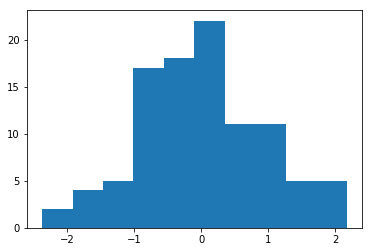

In [5]:
data = np.random.normal(0,1, 100)
plt.hist(data, bins=10)
plt.show()

## 2. Manipulation

In [36]:
X = np.ones([2, 3, 4])
X

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [37]:
Y = X.reshape(-1, 3, 2)

In [39]:
np.allclose(X.reshape(-1, 3, 2), Y)

True

In [47]:
assert np.allclose(X.reshape(-1, 3, 2), Y)

## 3. NumPy I/O

In [136]:
a = np.random.randint(0, 10, [2, 3])
b = np.random.random([2, 3])
np.savez("test", a, b)

In [137]:
!ls -al test*

-rw-r--r--  1 jookai  staff  562 Feb 19 16:54 test.npz


In [138]:
del a, b
%who

arr	 data	 np	 npzfiles	 plt	 


In [139]:
npzfiles = np.load("test.npz")
npzfiles.files

['arr_0', 'arr_1']

In [140]:
npzfiles['arr_0']

array([[2, 3, 3],
       [4, 5, 1]])

In [141]:
data = np.loadtxt("regression.csv", delimiter=",", skiprows=1, dtype={'names':("X", "Y"), 'formats':('f', 'f')})
data

array([( 3.3  , 1.7  ), ( 4.4  , 2.76 ), ( 5.5  , 2.09 ), ( 6.71 , 3.19 ),
       ( 6.93 , 1.694), ( 4.168, 1.573), ( 9.779, 3.366), ( 6.182, 2.596),
       ( 7.59 , 2.53 ), ( 2.167, 1.221), ( 7.042, 2.827), (10.791, 3.465),
       ( 5.313, 1.65 ), ( 7.997, 2.904), ( 5.654, 2.42 ), ( 9.27 , 2.94 ),
       ( 3.1  , 1.3  )], dtype=[('X', '<f4'), ('Y', '<f4')])

In [142]:
np.savetxt("regression_saved.csv", data, delimiter=",")
!ls -al regression_saved.csv

-rw-r--r--@ 1 jookai  staff  850 Feb 19 16:54 regression_saved.csv


## 4. Inspecting

In [134]:
arr = np.random.random([5,2,3])

In [85]:
print(type(arr))
print(len(arr))
print(arr.shape)
print(arr.ndim)
print(arr.size)
print(arr.dtype)


<class 'numpy.ndarray'>
5
(5, 2, 3)
3
30
float64


## 5. Operations

### 5.1 Arithmetic

In [126]:
a = np.arange(1, 5)
b = np.arange(9, 5, -1)

In [127]:
print(a - b)
print(a * b)


[-8 -6 -4 -2]
[ 9 16 21 24]


In [128]:
a = np.matrix(a)
b = np.matrix(b)

In [129]:
a * b.T

matrix([[70]])

In [130]:
a.T * b

matrix([[ 9,  8,  7,  6],
        [18, 16, 14, 12],
        [27, 24, 21, 18],
        [36, 32, 28, 24]])

### 5.2 Comparison

In [148]:
a = np.arange(1, 10).reshape(3,3)
b = np.arange(9, 0, -1).reshape(3,3)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [149]:
a == b

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

In [150]:
a > b

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

### 5.3 Aggregate (sum, min, max, mean, median, std)

In [160]:
a.sum(), np.sum(a)

(45, 45)

In [161]:
a.sum(axis=0), np.sum(a, axis=0)

(array([12, 15, 18]), array([12, 15, 18]))

In [162]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 6, 15, 24]), array([ 6, 15, 24]))

## Broadcasting

In [164]:
a = np.arange(1, 25).reshape(4, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [165]:
a + 100

array([[101, 102, 103, 104, 105, 106],
       [107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118],
       [119, 120, 121, 122, 123, 124]])

In [176]:
b = np.arange(6)
b

array([0, 1, 2, 3, 4, 5])

In [177]:
a + b

array([[ 1,  3,  5,  7,  9, 11],
       [ 7,  9, 11, 13, 15, 17],
       [13, 15, 17, 19, 21, 23],
       [19, 21, 23, 25, 27, 29]])

In [178]:
c = np.arange(4).reshape([4,1])
c

array([[0],
       [1],
       [2],
       [3]])

In [179]:
a + c

array([[ 1,  2,  3,  4,  5,  6],
       [ 8,  9, 10, 11, 12, 13],
       [15, 16, 17, 18, 19, 20],
       [22, 23, 24, 25, 26, 27]])

## Array copying

In [ ]:
a = np.random.randint(0, 9, (3, 3))